# Clustering Assignment

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# 1. Read and visualise the data

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import chart_studio.plotly
import plotly
from plotly import tools
import plotly.express as px
import datetime as dt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# number of rows and columns
country_df.shape

(167, 10)

In [4]:
# basics of the df
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. Clean and convert the data

In [5]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
# convert exports, imports and health into absolute values
country_df['exports'] =country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
# data summary
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 3. Visualize the data

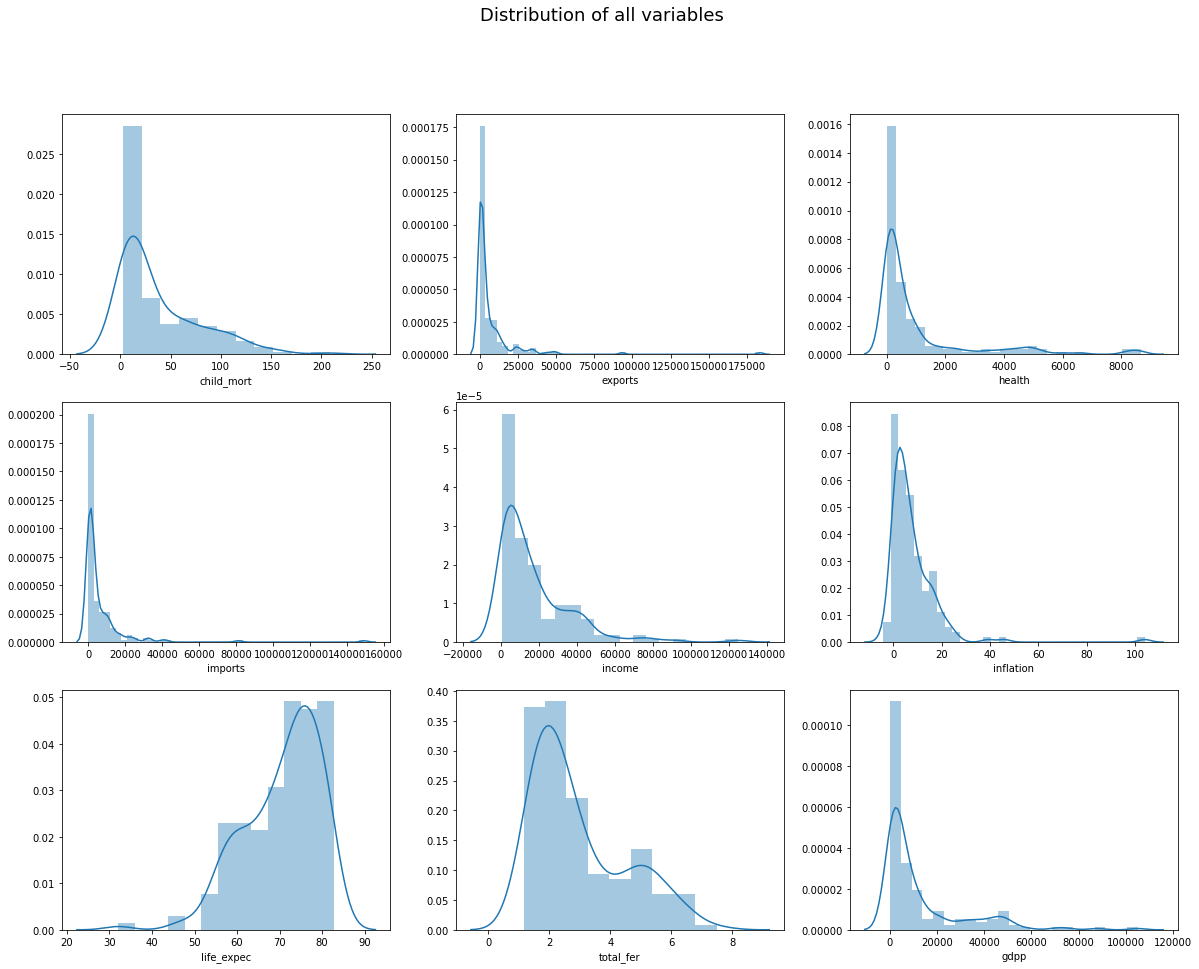

In [8]:
# Distribution of all variables
fig,a =  plt.subplots(3,3,figsize=(20,15))
sns.distplot(country_df['child_mort'],ax=a[0][0])
sns.distplot(country_df['exports'],ax=a[0][1])
sns.distplot(country_df['health'],ax=a[0][2])
sns.distplot(country_df['imports'],ax=a[1][0])
sns.distplot(country_df['income'],ax=a[1][1])
sns.distplot(country_df['inflation'],ax=a[1][2])
sns.distplot(country_df['life_expec'],ax=a[2][0])
sns.distplot(country_df['total_fer'],ax=a[2][1])
sns.distplot(country_df['gdpp'],ax=a[2][2])
fig.suptitle('Distribution of all variables', fontsize=18)
plt.show()

- From the graphs shown, it can be seen that all variables are right skewed except for ‘life_expec’ which is left skewed.
- Only  ‘child_mort’, ‘income’ and ‘gdpp’ show some kind of variation in them and hence these variables can be used for cluster profiling.

In [9]:
#Top 5 countries with highest and lowest child_mort
def pltt(feature, rang):
    grouped_df1 = country_df[['country', feature]].sort_values(by=feature,ascending = False).head(5)
    grouped_df2 = country_df[['country', feature]].sort_values(by=feature,ascending = True).head(5)
    fig = make_subplots(rows=1, cols=2, shared_yaxes=False)
    fig.add_trace(go.Bar(x=grouped_df1['country'], y=grouped_df1[feature]),row=1, col=1)
    fig.add_trace(go.Bar(x=grouped_df2['country'], y=grouped_df2[feature]),row=1, col=2)
    fig.update_xaxes(title_text="country", row=1, col=1)
    fig.update_xaxes(title_text="country", row=1, col=2)
    fig.update_yaxes(title_text=feature, row=1, col=1)
    fig.update_yaxes(title_text=feature, range=rang, row=1, col=2)
    fig.update_layout(height=550, width=1000, title_text="Top 5 countries with highest and lowest "+ feature)
    fig.show()
pltt('child_mort',[0,4])

- Haiti has highest child mortality
- Iceland has lowest child mortality

In [10]:
#Top 5 countries with highest and lowest exports
pltt('exports',[0,60])

- Luxembourg has highest exports
- Myanmar has lowest exports

In [11]:
#Top 5 countries with highest and lowest health
pltt('health',[0,30])

- United States spends a lot on health.
- Eritrea spends the least on health.

In [12]:
#Top 5 countries with highest and lowest imports
pltt('imports',[0,150])

- Luxembourg has highest imports.
- Myanmar has lowest imports.

In [13]:
#Top 5 countries with highest and lowest income
pltt('income',[0,1000])

- Qatar has highest income
- Congo, Dem. Rep. has lowest income

In [14]:
#Top 5 countries with highest and lowest inflation
pltt('inflation',[0,-6])

- Nigeria has highest inflation
- Seychelles has lowest inflation

In [15]:
#Top 5 countries with highest and lowest life_expec
pltt('life_expec', [0,70])

- Japan has highest life expectency
- Haiti has lowest life expectency

In [16]:
#Top 5 countries with highest and lowest total_fer
pltt('total_fer',[0,5])

- Niger has highest fertility rate
- Singapore has lowest fertility rate

In [17]:
#Top 5 countries with highest and lowest gdpp
pltt('gdpp',[0,500])

- Luxembourg has highest GDP
- Burundi has lowest GDP

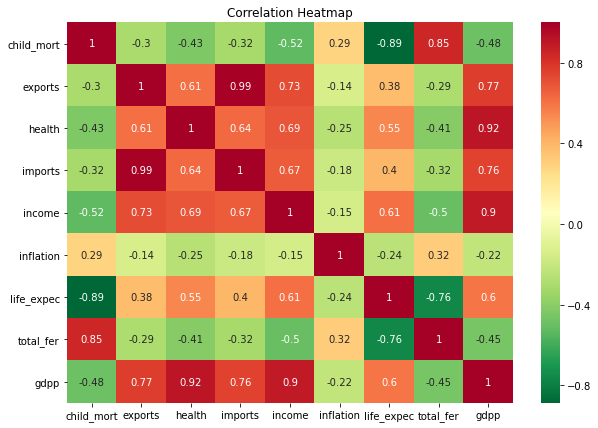

In [18]:
# Correlation Heatmap
country_df2 = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
corr = country_df2.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='RdYlGn_r')
plt.title('Correlation Heatmap')
plt.show()

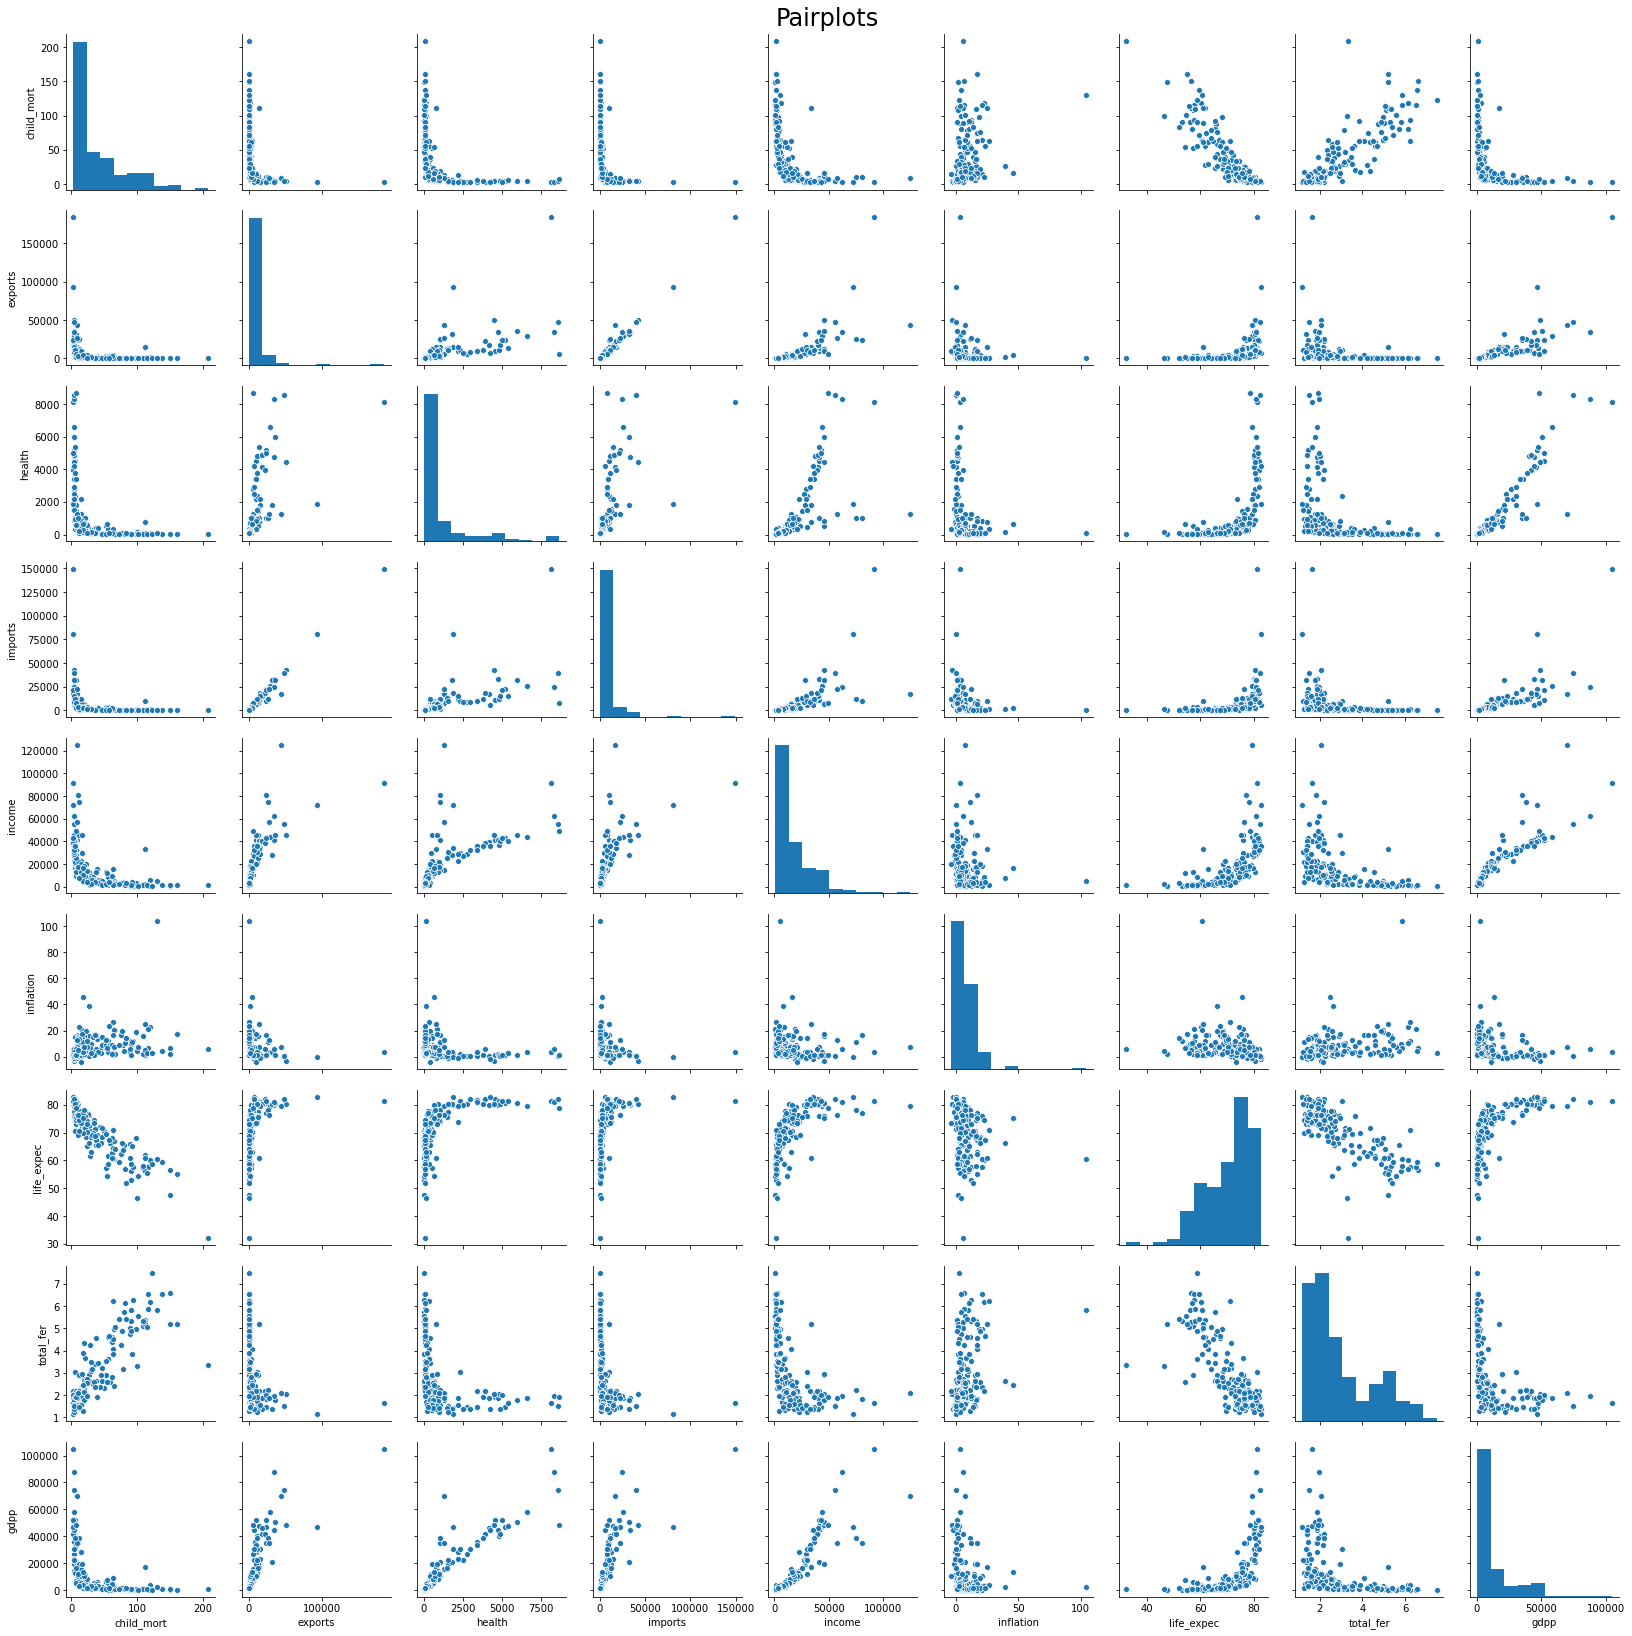

In [19]:
# Pairplots
sns.pairplot(country_df2)
plt.suptitle('Pairplots',y=1.008, fontsize=24)
plt.show()

Looking at the correlation heatmap and pairplots
- gdpp and health are highly correlated (0.92)
- gdpp and income are highly correlated (0.90)
- total_fer and child_mort are highly correlated (0.85)
- imports and exports are highly correlated (0.99)
- child_mort and life_expec are highly correlated (-0.89)
- life_expec and total_fer are highly correlated (-0.76)

# 4. Prepare the data for modelling

In [20]:
#Boxplots
fig = make_subplots(rows=3, cols=3)
fig.add_trace(go.Box(y=country_df['child_mort']),row=1, col=1)
fig.add_trace(go.Box(y=country_df['exports']),row=1, col=2)
fig.add_trace(go.Box(y=country_df['health']),row=1, col=3)
fig.add_trace(go.Box(y=country_df['imports']),row=2, col=1)
fig.add_trace(go.Box(y=country_df['income']),row=2, col=2)
fig.add_trace(go.Box(y=country_df['inflation']),row=2, col=3)
fig.add_trace(go.Box(y=country_df['life_expec']),row=3, col=1)
fig.add_trace(go.Box(y=country_df['total_fer']),row=3, col=2)
fig.add_trace(go.Box(y=country_df['gdpp']),row=3, col=3)
fig.update_yaxes(title_text="<b>child_mort<b/>", row=1, col=1)
fig.update_yaxes(title_text="<b>exports<b/>", row=1, col=2)
fig.update_yaxes(title_text="<b>health<b/>", row=1, col=3)
fig.update_yaxes(title_text="<b>imports<b/>", row=2, col=1)
fig.update_yaxes(title_text="<b>income<b/>", row=2, col=2)
fig.update_yaxes(title_text="<b>inflation<b/>", row=2, col=3)
fig.update_yaxes(title_text="<b>life_expec<b/>", row=3, col=1)
fig.update_yaxes(title_text="<b>total_fer<b/>", row=3, col=2)
fig.update_yaxes(title_text="<b>gdpp<b/>", row=3, col=3)
fig.update_layout(height=1000, width=1000,title_text="<b>BOXPLOT FOR EACH VARIABLE</b>",showlegend =False,font=dict(size=8))
fig.show()

- There are a lot of outliers in exports, health, imports, gdpp coulmns
- Clustering is highly sensitive to outliers so we will try to cap them

In [21]:
# Quantiles of different variables
country_df.quantile([0.9,0.92,.95, .97, .98, .99,1.0], axis = 0)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.90,100.22,17760.600,3825.4160,15034.280,41220.0,16.640,80.400,5.3220,41840.0
0.92,110.44,23984.800,4404.8356,17589.264,43776.0,18.424,80.844,5.4216,45724.0
0.95,116.00,31385.100,4966.7010,24241.560,48290.0,20.870,81.400,5.8610,48610.0
0.97,130.14,36367.618,5998.2260,32507.456,62496.0,23.626,81.902,6.2306,52218.0
0.98,145.16,46480.928,7663.6200,37651.400,74208.0,25.988,82.000,6.4504,66364.0
0.99,153.40,64794.260,8410.3304,55371.390,84374.0,41.478,82.370,6.5636,79088.0
1.00,208.00,183750.000,8663.6000,149100.000,125000.0,104.000,82.800,7.4900,105000.0


Based on the observations
- child_mort, inflation: They are very important feature in defining whether a country is in need of funds or not so we do not cap them.
- export, health, imports, total_fer, income and gdpp : We will impute outlier using capping (0.99 percentile)
- life_expec : It has outlers bellow the lower hinge, but again it is an important feauture in defining whether a country is in need of funds or not so we do not cap them.

In [22]:
# capping outliers
q1 = country_df['imports'].quantile(0.99)
q2 = country_df['health'].quantile(0.99)
q3 = country_df['exports'].quantile(0.99)
q4 = country_df['income'].quantile(0.99)
q5 = country_df['total_fer'].quantile(0.99)
q6 = country_df['gdpp'].quantile(0.99)

country_df['imports'][country_df['imports']>= q1] = q1
country_df['health'][country_df['health']>= q2] = q2
country_df['exports'][country_df['exports']>= q3] = q3
country_df['income'][country_df['income']>= q4] = q4
country_df['total_fer'][country_df['total_fer']>= q5] = q5
country_df['gdpp'][country_df['gdpp']>= q6] = q6

In [23]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.800000,6.563600,79088.000000


In [24]:
# 2. rescaling
rfm_df = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [25]:
# converting scaled data to pandas dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


# 4. Modelling

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [26]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.9143143082458995

We get a very good value for hopkins statistics and hence we can proceed with clustering

## Finding the Optimal Number of Clusters

### SSD

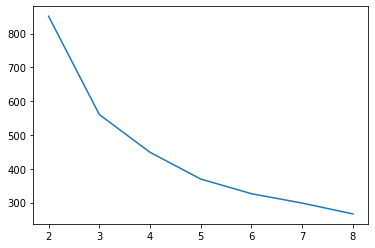

In [28]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append([num_clusters,kmeans.inertia_])
    
# plot the SSDs for each n_clusters
# ssd
x = pd.DataFrame(ssd)
plt.plot(x[0],x[1])

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.47855374339543755
For n_clusters=3, the silhouette score is 0.42330733362616313
For n_clusters=4, the silhouette score is 0.4091396796207265
For n_clusters=5, the silhouette score is 0.41546490325017316
For n_clusters=6, the silhouette score is 0.31666141670921916
For n_clusters=7, the silhouette score is 0.32214633180310204
For n_clusters=8, the silhouette score is 0.2997231030055811


**By observing both elbow curve and silhouette scores, number of clusters = 3 seems to be optimal.**

## K-Means Clustering

In [30]:
# final model with k=3
kmeans = KMeans(n_clusters=3,random_state = 50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [32]:
# assign the label
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [33]:
# Boxplots of clsuters vs features for Kmeans
fig = make_subplots(rows=1, cols=3, shared_xaxes=True)
fig.add_trace(go.Box(x=country_df['cluster_id'], y=country_df['child_mort']),row=1, col=1)
fig.add_trace(go.Box(x=country_df['cluster_id'], y=country_df['income']),row=1, col=2)
fig.add_trace(go.Box(x=country_df['cluster_id'], y=country_df['gdpp']),row=1, col=3)
fig.update_xaxes(title_text="cluster_id")
fig.update_yaxes(title_text="child_mort", row=1, col=1)
fig.update_yaxes(title_text="income", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Boxplots of clsuters vs features for Kmeans", showlegend=False )
fig.show()

In [34]:
# Scatter plots of clusters formed by KMeans Clustering
fig = make_subplots(rows=1, cols=3, shared_yaxes=False)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['income'], mode='markers',
                         marker_color=country_df['cluster_id']),row=1, col=1)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_id']),row=1, col=2)
fig.add_trace(go.Scatter(x=country_df['income'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_id']),row=1, col=3)
fig.update_xaxes(title_text="child_mort", row=1, col=1)
fig.update_xaxes(title_text="child_mort", row=1, col=2)
fig.update_xaxes(title_text="income", row=1, col=3)
fig.update_yaxes(title_text="income", row=1, col=1)
fig.update_yaxes(title_text="gdpp", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Scatter plots of clusters formed by Kmeans", showlegend=False)
fig.show()


- Clusters are well formed

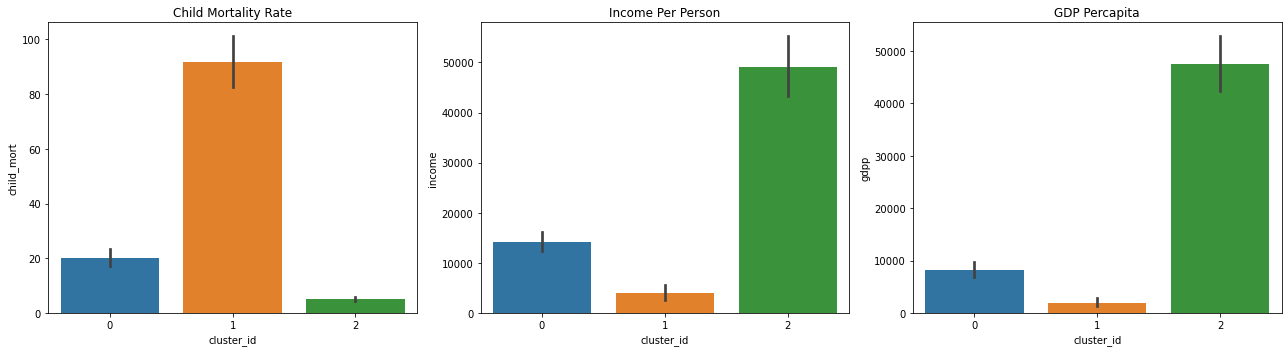

In [35]:
# cluster profiling for Kmeans
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'cluster_id', y = 'child_mort', data=country_df)
plt.title('Child Mortality Rate')


plt.subplot(1,3,2)
sns.barplot(x = 'cluster_id', y = 'income', data=country_df)
plt.title('Income Per Person')

plt.subplot(1,3,3)
sns.barplot(x = 'cluster_id', y = 'gdpp', data=country_df)
plt.title('GDP Percapita')


plt.tight_layout()

plt.show()

From above graphs of Kmeans clustering, it is clear that:
- cluster_id = 1 represents `Undeveloped country` with high child mortality and low income and gdp
- cluster_id = 0 represetnts `Developing country` with lesser child mortality and higher income and gdp
- cluster_id = 2 represetnts `Developed country` with least child mortality and highest income and gdp

In [36]:
Kmean_df = country_df
Kmean_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


cluster_id=1 are the ones that are undeveloped. These countries are our major area of concern and the ones that need funding

In [37]:
# Undeveloped countries
und_kmean = Kmean_df[Kmean_df['cluster_id']==1]
und_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


To select the countries which are in direst need of aid, we will sort the dataset by child_mort, income and gdpp

In [38]:
# list of countries in dire need of aid from Kmeans clustering
final_list_kmean = und_kmean.sort_values(by = ['child_mort', 'income', 'gdpp'],
                                         ascending = [False, True, True]).head(5).reset_index(drop=True)

In [39]:
final_list_kmean

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,1
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1
2,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,1
3,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1
4,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,1


**The above 5 countries are those which are in direst need of aid accoriding to Kmeans clustering**

## Hierarchical Clustering

In [40]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


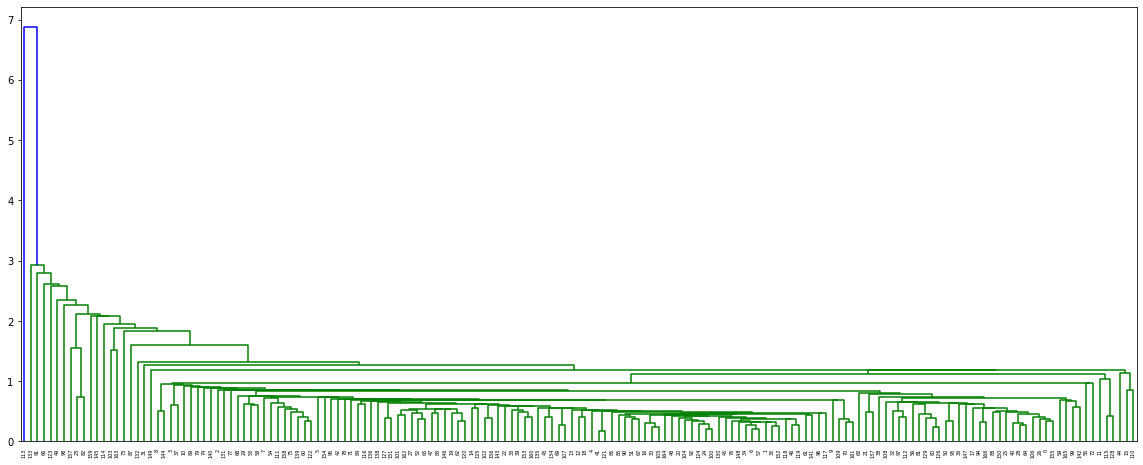

In [41]:
# single linkage
plt.figure(figsize = (20,8))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- Looking at the dendrogram of single linkage, clusters are not formed properly

In [42]:
cluster_labels_single = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

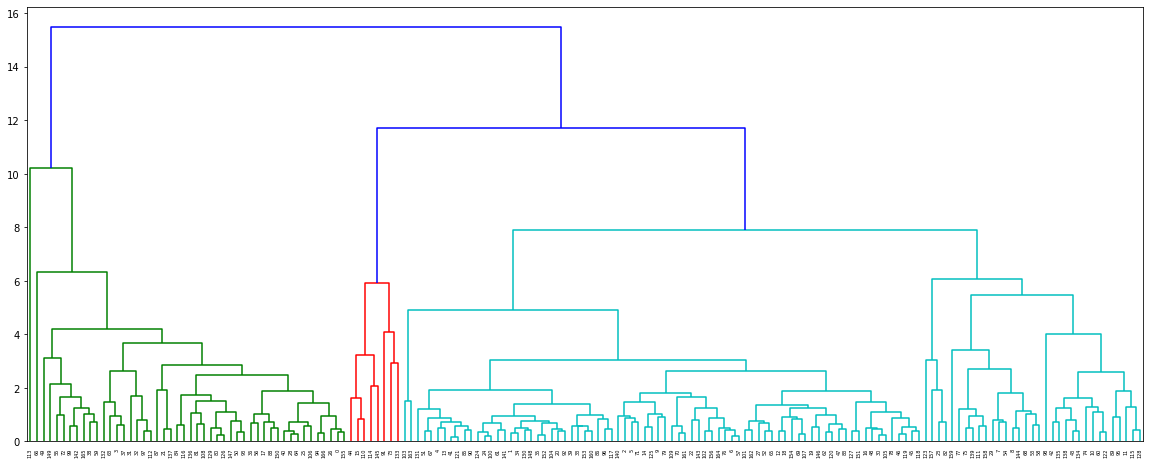

In [43]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- Clusters formed in complete linkage seems to be better than that formed in single linkage

In [44]:
cluster_labels_comp = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_comp

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [45]:
# assign cluster labels
country_df['cluster_labels_single'] = cluster_labels_single
country_df['cluster_labels_comp'] = cluster_labels_comp
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_single,cluster_labels_comp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,1


In [46]:
# Boxplots of clsuters vs features for Hierarchical single linkage
fig = make_subplots(rows=1, cols=3, shared_yaxes=False)
fig.add_trace(go.Box(x=country_df['cluster_labels_single'], y=country_df['child_mort']),row=1, col=1)
fig.add_trace(go.Box(x=country_df['cluster_labels_single'], y=country_df['income']),row=1, col=2)
fig.add_trace(go.Box(x=country_df['cluster_labels_single'], y=country_df['gdpp']),row=1, col=3)
fig.update_xaxes(title_text="cluster_labels_single")
fig.update_yaxes(title_text="child_mort", row=1, col=1)
fig.update_yaxes(title_text="income", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Boxplots of clsuters vs features for Hierarchical single linkage",showlegend=False )
fig.show()

In [47]:
# Scatter plots of clusters formed by Hierarchical Clustering single linkage
fig = make_subplots(rows=1, cols=3, shared_yaxes=False)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['income'], mode='markers',
                         marker_color=country_df['cluster_labels_single']),row=1, col=1)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_labels_single']),row=1, col=2)
fig.add_trace(go.Scatter(x=country_df['income'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_labels_single']),row=1, col=3)
fig.update_xaxes(title_text="child_mort", row=1, col=1)
fig.update_xaxes(title_text="child_mort", row=1, col=2)
fig.update_xaxes(title_text="income", row=1, col=3)
fig.update_yaxes(title_text="income", row=1, col=1)
fig.update_yaxes(title_text="gdpp", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Scatter plots of clusters formed by Hierarchical Clustering single linkage", showlegend=False)
fig.show()

- As seen from the above box and scatter plots, we can conclude that single linkage does not form proper clusters which we also saw from its dendrogram

In [48]:
# Boxplots of clsuters vs features for Hierarchical complete linkage
fig = make_subplots(rows=1, cols=3, shared_yaxes=False)
fig.add_trace(go.Box(x=country_df['cluster_labels_comp'], y=country_df['child_mort']),row=1, col=1)
fig.add_trace(go.Box(x=country_df['cluster_labels_comp'], y=country_df['income']),row=1, col=2)
fig.add_trace(go.Box(x=country_df['cluster_labels_comp'], y=country_df['gdpp']),row=1, col=3)
fig.update_xaxes(title_text="cluster_labels_comp")
fig.update_yaxes(title_text="child_mort", row=1, col=1)
fig.update_yaxes(title_text="income", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Boxplots of clsuters vs features for Hierarchical complete linkage",showlegend=False)
fig.show()

In [49]:
#Scatter plots of clusters formed by Hierarchical Clustering complete linkage
fig = make_subplots(rows=1, cols=3, shared_yaxes=False)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['income'], mode='markers',
                         marker_color=country_df['cluster_labels_comp']),row=1, col=1)
fig.add_trace(go.Scatter(x=country_df['child_mort'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_labels_comp']),row=1, col=2)
fig.add_trace(go.Scatter(x=country_df['income'], y=country_df['gdpp'], mode='markers',
                        marker_color=country_df['cluster_labels_comp']),row=1, col=3)
fig.update_xaxes(title_text="child_mort", row=1, col=1)
fig.update_xaxes(title_text="child_mort", row=1, col=2)
fig.update_xaxes(title_text="income", row=1, col=3)
fig.update_yaxes(title_text="income", row=1, col=1)
fig.update_yaxes(title_text="gdpp", row=1, col=2)
fig.update_yaxes(title_text="gdpp", row=1, col=3)
fig.update_layout(height=400, width=1050, title_text="Scatter plots of clusters formed by Hierarchical Clustering complete linkage", showlegend=False)
fig.show()

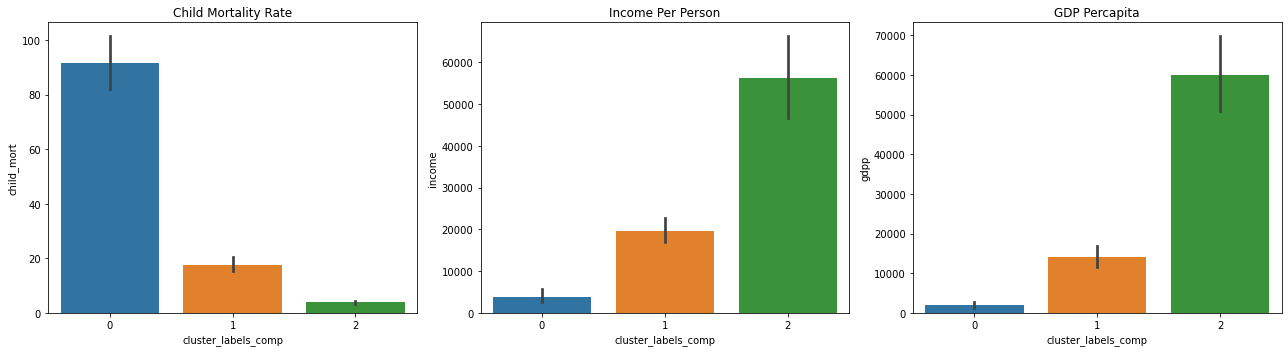

In [50]:
# cluster profiling for complete linkage
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'cluster_labels_comp', y = 'child_mort', data=country_df)
plt.title('Child Mortality Rate')


plt.subplot(1,3,2)
sns.barplot(x = 'cluster_labels_comp', y = 'income', data=country_df)
plt.title('Income Per Person')

plt.subplot(1,3,3)
sns.barplot(x = 'cluster_labels_comp', y = 'gdpp', data=country_df)
plt.title('GDP Percapita')


plt.tight_layout()

plt.show()

From above graphs of Hierarchical clustering -complete linkage, it is clear that:
- complete linkage gives better clusters than single linkage
- cluster_id = 0 represents `Undeveloped country` with high child mortality and low income and gdp
- cluster_id = 1 represetnts `Developing country` with lesser child mortality and higher income and gdp
- cluster_id = 2 represetnts `Developed country` with least child mortality and highest income and gdp

In [51]:
Hier_df = country_df[['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels_comp']]
Hier_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_comp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


cluster_leabels_comp=0 are the ones that are undeveloped. These countries are our major area of concern and the ones that need funding

In [52]:
# Undeveloped countries
und_hier = Hier_df[Hier_df['cluster_labels_comp']==0]
und_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_comp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [53]:
# list of countries in dire need of aid from Hirearchical clsutering
final_list_hier=und_hier.sort_values(by = ['child_mort', 'income', 'gdpp'], 
                                     ascending = [False, True, True]).head(5).reset_index(drop=True)

In [54]:
final_list_hier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_comp
0,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
2,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
3,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
4,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


**The above 5 countries are those which are in direst need of aid according to Hierarchical Clustering complete linkage.**

Let us check if the countries list we got from Kmeans is same as the one we got in Hierarchical cclustering

In [55]:
list(final_list_kmean['country'])==list(final_list_hier['country'])

True

## Results and Conclusions

In [56]:
# Check the % of data points in clusters formed
H_cluster_per = country_df.cluster_labels_comp.value_counts(normalize = True)*100
print('Hierarchical Clustering Countries %:\n')
print(H_cluster_per)


K_cluster_per = country_df.cluster_id.value_counts(normalize = True)*100
print('\nKMean Clustering Countries %:\n')
print(K_cluster_per)

Hierarchical Clustering Countries %:

1    66.467066
0    28.742515
2     4.790419
Name: cluster_labels_comp, dtype: float64

KMean Clustering Countries %:

0    55.089820
1    28.742515
2    16.167665
Name: cluster_id, dtype: float64


- The main objective was to find out the countries that are in dire need of aid based on some socio economic factors.
- After performing certain data analysis we found out that ‘child_mort’, ‘income’ and ‘gdpp’ are the three columns that can be used for cluster profiling. Also, we decided to keep number of clusters as 3.
- After performing Kmeans and Hierarchical clustering we found out that the cluster with cluster id = 1 in Kmeans and cluster with cluster id 0 in Hierarchical clustering are the ones with:
  - High child mortality.
  - Low income and
  - Low GDP 
and hence these can be categorized as **undeveloped countries**.
- The cluster with least child mortality, high income and high GDP is categorized as **developed countries** and the other cluster which has moderate child moratlity, moderate income and moderate GDP is categorized as **developing countries**.
- We can conclude that keeping number of clusters as 3 was beneficial as we could categorize the countries into undeveloped, developed and developing countries.
- We get the same list of countries (top 5) that are in dire need of aid in Kmeans as well as Hierarchical clusteing and these countries are **'Haiti', 'Sierra Leone', 'Chad', 'Central African Republic’ and 'Mali’** . These are the countries that CEO of HELP must look into.
- Although the list of countries that are in dire need of aid are same in both Kmeans and Hierarchical, K means performs a lot better than Hierarchical and the reason is:
   - Out of 167 countries, Hierarchical Clustering clusters only around 5% of them as developed.
   - According to UN, there are around 31 out of 193 countries (around 16%-17%) which are considered as developed countries based on Human Development Index(HDI).
   - Kmeans on the other hand clusters around 16% as Developed countries.


## Recommendations

- The top 5 countries that are in dire need of aid are 'Haiti', 'Sierra Leone', 'Chad', 'Central African Republic’ and 'Mali’ .
- For these countries, the child mortality is high and gdpp, income are very low and hence are undeveloped countries.
- Countries which have less child mortality, high gdpp and high income are clustered as either developed or developing countries and these can be left out and need not be considered for providing aid.
- Child mortality is high correlated (inversely) to gdpp and income and hence reducing child mortality is very important from health as well as income and gdpp point of view.
- For these 5 countries, we can also see that total fertility is high and life expectancy is low. It is good to have less number of children per family so that parents can give proper attention to each of their children.
- For these 5 countries, we can also see that exports and imports are too low and it is something that should be looked into.
